<a href="https://colab.research.google.com/github/VaniaJesus/Proj_Aplicado-4/blob/main/Trab_Aplic_4_V_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
pol_dia = pd.read_csv("/content/pol_dia.csv")

print(pol_dia.head(10))

   Unnamed: 0        Data          Estacao Poluente   Valor
0           0  01/01/2020    Capão Redondo     MP10   28.74
1           1  01/01/2020    Capão Redondo       O3   51.56
2           2  01/01/2020  Cerqueira César       CO  842.17
3           3  01/01/2020  Cerqueira César     MP10   30.09
4           4  01/01/2020  Cerqueira César      NO2   14.55
5           5  01/01/2020  Cerqueira César      SO2    0.48
6           6  01/01/2020        Congonhas       CO  645.53
7           7  01/01/2020        Congonhas      NO2   29.65
8           8  01/01/2020        Congonhas      SO2    1.26
9           9  01/01/2020       Ibirapuera    MP2.5   26.48


In [ ]:
pol_dia.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
pol_dia.describe()

,Valor
count,45604.000000
mean,103.680333
std,235.530603
min,0.000000
25%,14.790000
50%,28.710000
75%,50.670000
max,3696.200000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

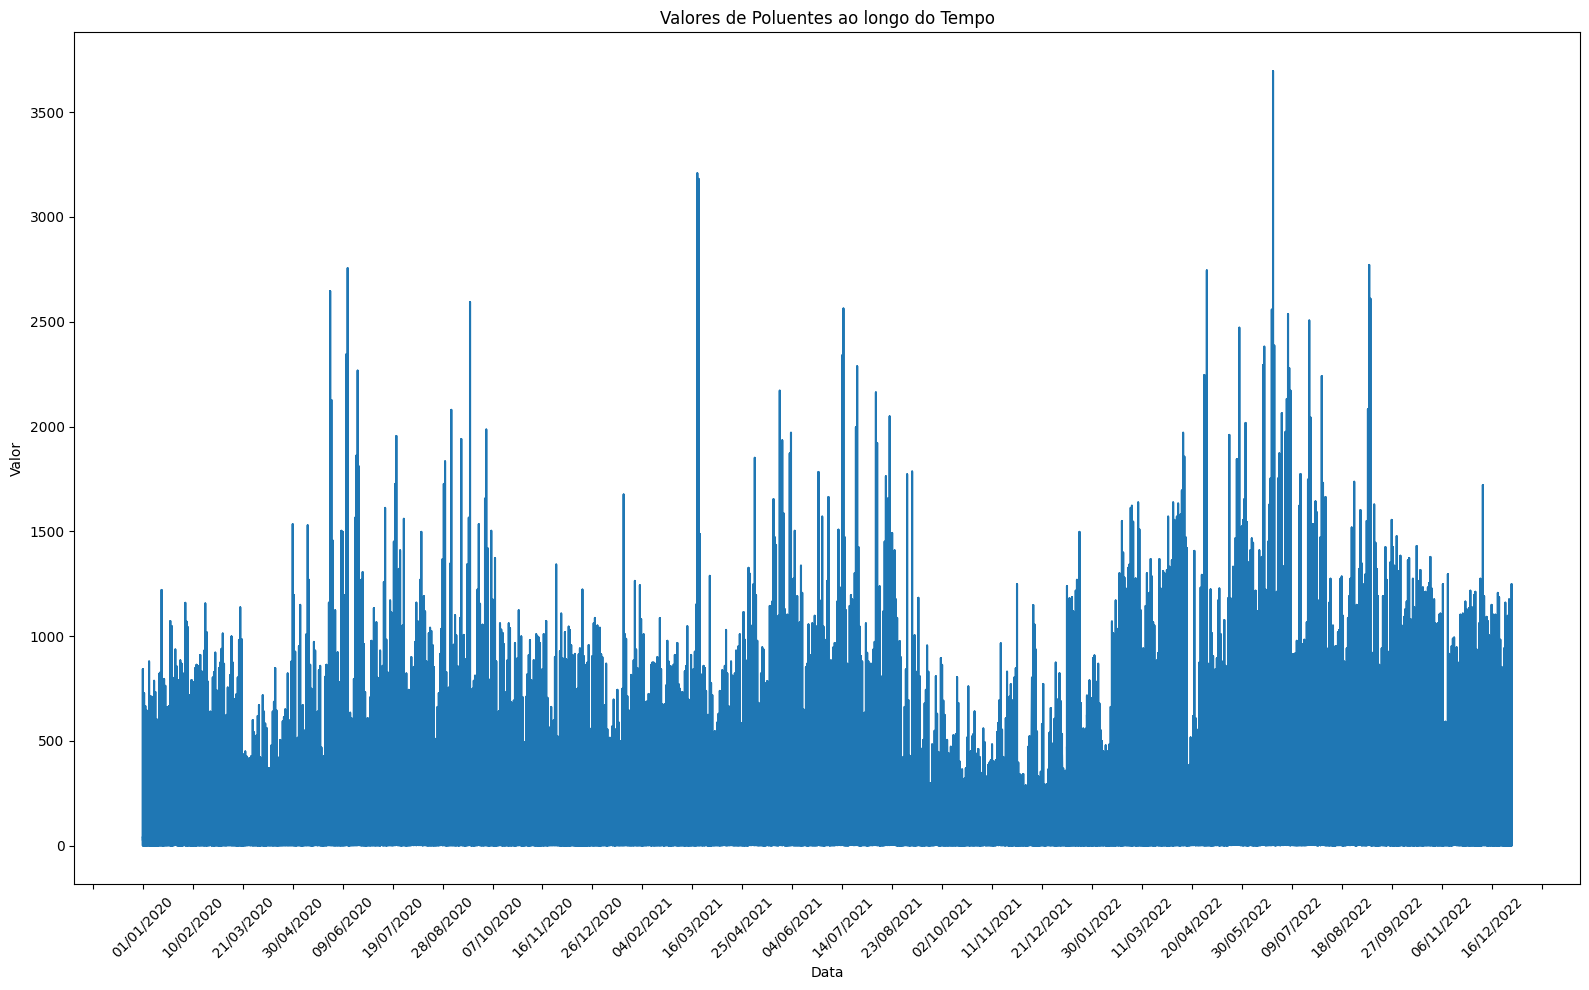

In [ ]:
# Série temporal de "Valor" ao longo do tempo

import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(16, 10))

plt.plot(pol_dia['Data'], pol_dia['Valor'])
plt.title('Valores de Poluentes ao longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=40))
plt.tight_layout()
plt.show()

## Correção dos Dados

In [ ]:
# Separando a coluna 'Poluente' em colunas separadas incluindo as estações

pol_sp = pol_dia.pivot_table(index=['Data', 'Estacao'], columns='Poluente', values='Valor')

# Exibindo o DataFrame reorganizado
print(pol_sp.head())

Poluente                        CO  FMC   MP10  MP2.5    NO2     O3  PTS   SO2
Data       Estacao                                                            
01/01/2020 Capão Redondo       NaN  NaN  28.74    NaN    NaN  51.56  NaN   NaN
           Cerqueira César  842.17  NaN  30.09    NaN  14.55    NaN  NaN  0.48
           Congonhas        645.53  NaN    NaN    NaN  29.65    NaN  NaN  1.26
           Ibirapuera          NaN  NaN    NaN  26.48    NaN    NaN  NaN   NaN
           Interlagos          NaN  NaN  37.39    NaN  16.36  54.09  NaN  1.40


In [ ]:
# Separando a coluna 'Poluente' em colunas separadas sem as estações

pol_sp2 = pol_dia.pivot_table(index='Data', columns='Poluente', values='Valor')

# Exibindo o DataFrame reorganizado
print(pol_sp2.head())

Poluente            CO  FMC       MP10      MP2.5        NO2         O3  PTS  \
Data                                                                           
01/01/2020  561.921667  NaN  33.600000  27.106667  18.621667  52.610000  NaN   
01/01/2021  468.693333  NaN  15.737778  13.072000  14.167500  40.277778  NaN   
01/01/2022  716.612000  NaN  26.977778  23.830000  15.812000  26.148000  NaN   
01/01/2023  962.482857  NaN  63.000000  46.166667  28.833333  19.583333  NaN   
01/02/2020  603.173333  NaN  12.059000   8.270000  24.651429  31.504167  NaN   

Poluente         SO2  
Data                  
01/01/2020  1.535000  
01/01/2021  1.523333  
01/01/2022  1.707500  
01/01/2023  0.000000  
01/02/2020  2.265000  


In [ ]:
pol_sp2.isnull().sum()

,0
Poluente,
CO,0
FMC,931
MP10,0
MP2.5,0
NO2,0
O3,0
PTS,984
SO2,6


In [ ]:
pol_sp2['PTS'].size

1097

In [ ]:
# Vamos remover as colunas referentes aos poluentes 'FMC' e 'PTS' devido ao número de dados nulos

pol_sp2.drop(columns=['FMC','PTS'], inplace=True)
pol_sp2

Poluente,CO,MP10,MP2.5,NO2,O3,SO2
Data,,,,,,
01/01/2020,561.921667,33.600000,27.106667,18.621667,52.610000,1.535000
01/01/2021,468.693333,15.737778,13.072000,14.167500,40.277778,1.523333
01/01/2022,716.612000,26.977778,23.830000,15.812000,26.148000,1.707500
01/01/2023,962.482857,63.000000,46.166667,28.833333,19.583333,0.000000
01/02/2020,603.173333,12.059000,8.270000,24.651429,31.504167,2.265000
...,...,...,...,...,...,...
31/10/2021,360.813333,14.294000,8.980000,19.034000,33.511000,1.215000
31/10/2022,619.416667,12.787500,8.400000,40.004000,44.034545,0.505000
31/12/2020,494.844000,13.435556,8.792000,19.770000,41.297778,0.500000


In [ ]:
# Substituir valores nulos por 0 no DataFrame reorganizado

pol_sp2.fillna(0, inplace=True)

print(pol_sp2.head())

Poluente            CO       MP10      MP2.5        NO2         O3       SO2
Data                                                                        
01/01/2020  561.921667  33.600000  27.106667  18.621667  52.610000  1.535000
01/01/2021  468.693333  15.737778  13.072000  14.167500  40.277778  1.523333
01/01/2022  716.612000  26.977778  23.830000  15.812000  26.148000  1.707500
01/01/2023  962.482857  63.000000  46.166667  28.833333  19.583333  0.000000
01/02/2020  603.173333  12.059000   8.270000  24.651429  31.504167  2.265000


In [ ]:
# Arredondar os valores para 2 casas decimais
pol_sp2 = pol_sp2.round(2)

print(pol_sp2.head())

Poluente        CO   MP10  MP2.5    NO2     O3   SO2
Data                                                
01/01/2020  561.92  33.60  27.11  18.62  52.61  1.54
01/01/2021  468.69  15.74  13.07  14.17  40.28  1.52
01/01/2022  716.61  26.98  23.83  15.81  26.15  1.71
01/01/2023  962.48  63.00  46.17  28.83  19.58  0.00
01/02/2020  603.17  12.06   8.27  24.65  31.50  2.26


In [ ]:
# Corrigindo as Datas e passando para o formato datetime

pol_sp2.index = pd.to_datetime(pol_sp2.index, format='%d/%m/%Y')
pol_sp2 = pol_sp2.sort_index()

print(pol_sp2.head())

Poluente        CO   MP10  MP2.5    NO2     O3   SO2
Data                                                
2020-01-01  561.92  33.60  27.11  18.62  52.61  1.54
2020-01-02  520.18  14.62   8.06  28.57  39.01  0.46
2020-01-03  356.97   7.76   4.75  18.76  30.54  0.44
2020-01-04  377.12  10.55   6.54  21.00  37.86  0.54
2020-01-05  411.63  12.05   8.34  19.08  39.51  0.87


## EAD para Séries Temporais

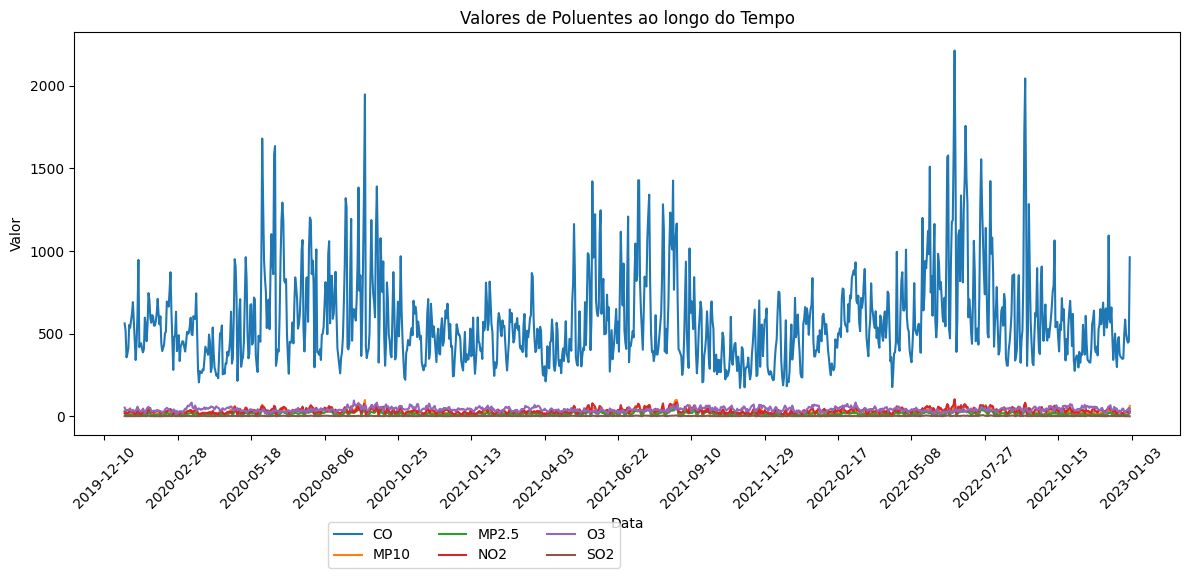

In [ ]:
# com as todas as colunas

plt.figure(figsize=(12, 6))

plt.plot(pol_sp2.index, pol_sp2[['CO', 'MP10', 'MP2.5', 'NO2', 'O3','SO2']])
plt.title('Valores de Poluentes ao longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.legend(['CO', 'MP10', 'MP2.5', 'NO2', 'O3', 'SO2'], bbox_to_anchor=(0.5, -0.2), loc='upper right', ncol=3)
plt.tight_layout()
plt.show()

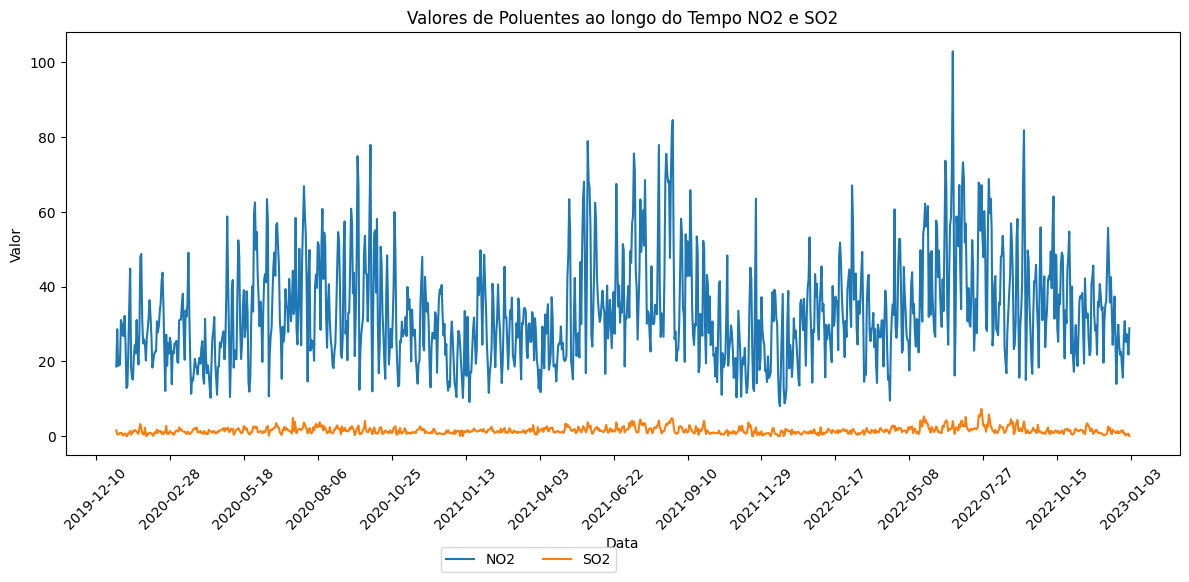

In [ ]:
# Poluentes 'NO2','SO2'

plt.figure(figsize=(12, 6))

plt.plot(pol_sp2.index, pol_sp2[['NO2', 'SO2']])
plt.title('Valores de Poluentes ao longo do Tempo NO2 e SO2')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.legend(['NO2','SO2'], bbox_to_anchor=(0.5, -0.2), loc='upper right', ncol=3)
plt.tight_layout()
plt.show()

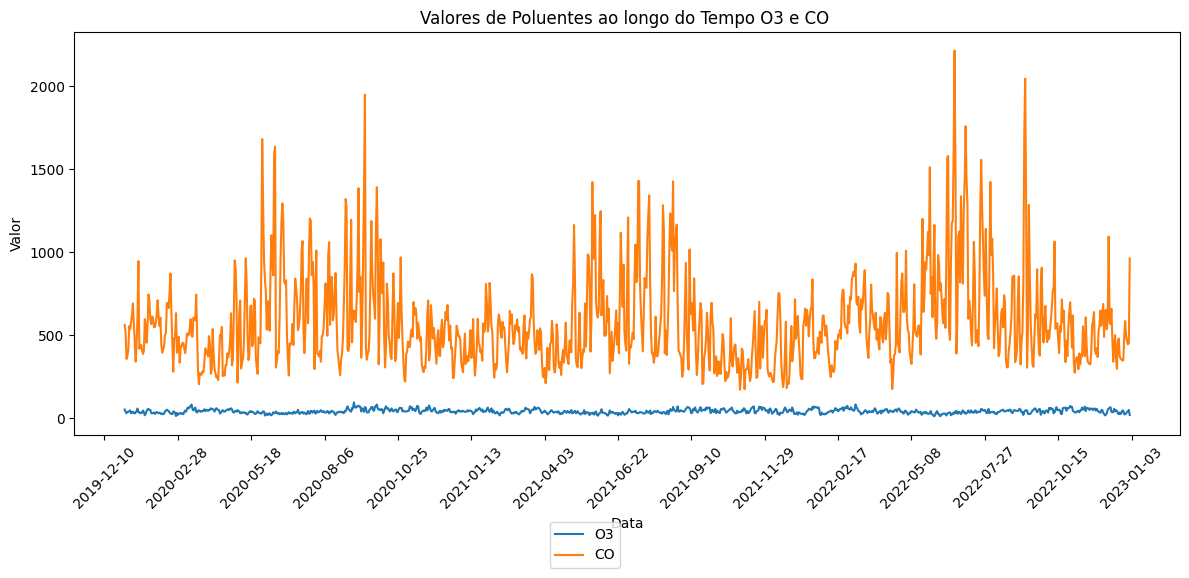

In [ ]:
# 'O3','CO'

plt.figure(figsize=(12, 6))

plt.plot(pol_sp2.index, pol_sp2[['O3','CO']])
plt.title('Valores de Poluentes ao longo do Tempo O3 e CO ')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.legend(['O3','CO'], bbox_to_anchor=(0.5, -0.2), loc='upper right')
plt.tight_layout()
plt.show()

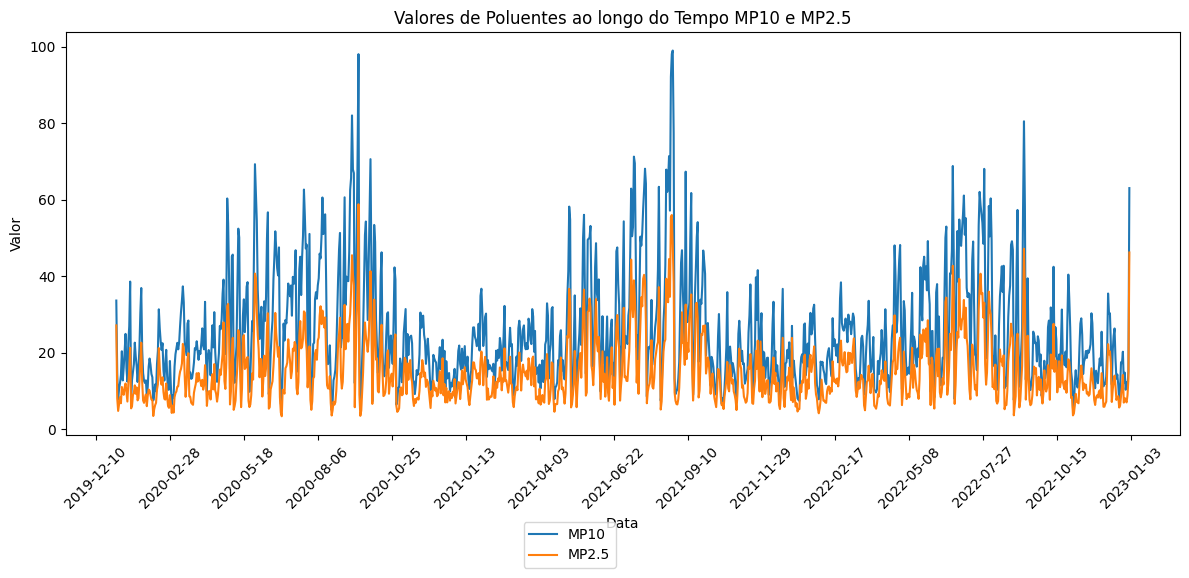

In [ ]:
# 'MP10', 'MP2.5'

plt.figure(figsize=(12, 6))

plt.plot(pol_sp2.index, pol_sp2[['MP10', 'MP2.5']])
plt.title('Valores de Poluentes ao longo do Tempo MP10 e MP2.5')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.legend(['MP10', 'MP2.5'], bbox_to_anchor=(0.5, -0.2), loc='upper right')
plt.tight_layout()
plt.show()

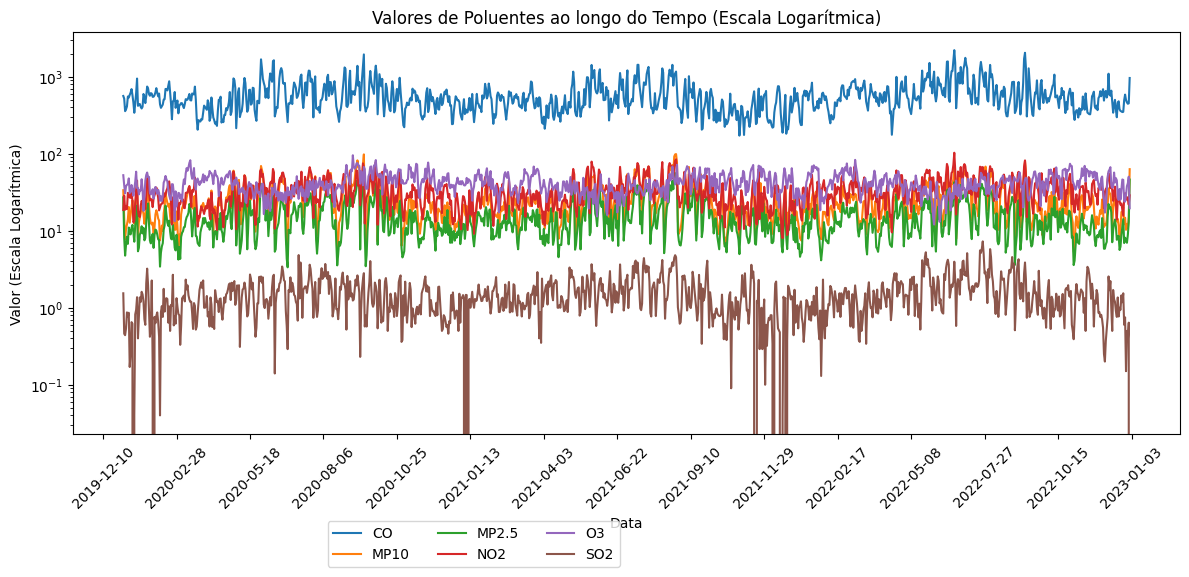

In [ ]:
# Plotando todos os poluentes Definindo a escala logarítmica no eixo Y

plt.figure(figsize=(12, 6))

plt.plot(pol_sp2.index, pol_sp2[['CO', 'MP10', 'MP2.5', 'NO2', 'O3', 'SO2']])

plt.yscale('log')

plt.title('Valores de Poluentes ao longo do Tempo (Escala Logarítmica)')
plt.xlabel('Data')
plt.ylabel('Valor (Escala Logarítmica)')
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.legend(['CO', 'MP10', 'MP2.5', 'NO2', 'O3', 'SO2'], bbox_to_anchor=(0.5, -0.2), loc='upper right', ncol=3)
plt.tight_layout()
plt.show()


###  Danos à Saúde

| **Poluente** | **Problemas de Saúde** | **Limite Máximo (OMS) - 24h** | **Limite Perigoso (OMS)** |
|--------------|------------------------|------------------------------|---------------------------|
| **CO (Monóxido de Carbono)** | Dificuldade respiratória, tontura, fadiga, náusea, danos ao sistema nervoso central. Exposição prolongada pode ser fatal. | **10 mg/m³ (média de 8h)** | **> 30 mg/m³**: Perigoso, risco de morte com exposição prolongada. |
| **MP10 (Material Particulado ≤ 10 µm)** | Irritação nos olhos, nariz e garganta, problemas respiratórios, agravamento de doenças cardíacas e pulmonares. | **45 µg/m³** | **> 150 µg/m³**: Aumento de mortalidade em populações sensíveis. |
| **MP2.5 (Material Particulado ≤ 2.5 µm)** | Penetra profundamente nos pulmões, causando problemas respiratórios graves, câncer de pulmão, doenças cardiovasculares. | **15 µg/m³** | **> 50 µg/m³**: Danos irreparáveis aos pulmões e risco de morte prematura. |
| **NO2 (Dióxido de Nitrogênio)** | Agravamento da asma, inflamação pulmonar, infecções respiratórias, danos crônicos ao sistema respiratório. | **25 µg/m³** | **> 200 µg/m³**: Risco de danos pulmonares graves e crônicos. |
| **O3 (Ozônio Troposférico)** | Irritação nos olhos, tosse, falta de ar, agravamento de doenças respiratórias, diminuição da função pulmonar. | **100 µg/m³ (média de 8h)** | **> 200 µg/m³**: Perigoso, pode causar danos irreparáveis ao tecido pulmonar. |
| **SO2 (Dióxido de Enxofre)** | Irritação no sistema respiratório, aumento de sintomas em asmáticos, redução da função pulmonar, aumento do risco de doenças cardíacas. | **40 µg/m³** | **> 500 µg/m³**: Altamente perigoso, danos irreparáveis ao sistema respiratório. |


## Usar Random Forest para determinar a importância dos poluentes

In [ ]:
# Criação de uma variável de destino (soma dos poluentes-Variável alvo)


pol_sp2['Total_Poluentes'] = pol_sp2[['CO', 'MP10', 'MP2.5', 'NO2', 'O3', 'SO2']].sum(axis=1)

X = pol_sp2[['CO', 'MP10', 'MP2.5', 'NO2', 'O3', 'SO2']]
y = pol_sp2['Total_Poluentes']

In [ ]:
# Treinar o Algoritmo

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

modelo_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

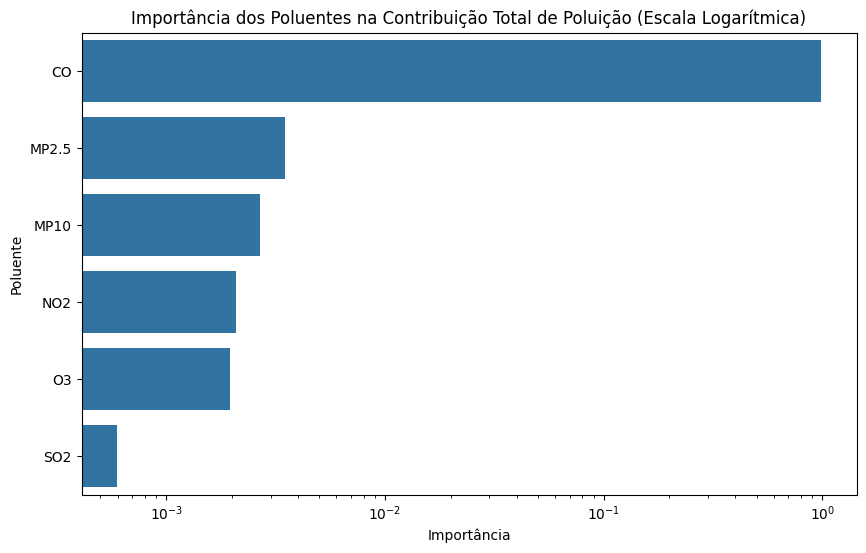

In [ ]:
# Importância das variáveis

importancias = modelo_rf.feature_importances_
importancias_df = pd.DataFrame({'Poluente': X.columns, 'Importância': importancias})
importancias_df = importancias_df.sort_values(by='Importância', ascending=False)

# Gráfico em escala logarítmica no eixo x

plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Poluente', data=importancias_df)

plt.xscale('log')
plt.title('Importância dos Poluentes na Contribuição Total de Poluição (Escala Logarítmica)')
plt.show()



Matriz de Correlação:
Poluente        CO      MP10     MP2.5
Poluente                              
CO        1.000000  0.783020  0.781552
MP10      0.783020  1.000000  0.958003
MP2.5     0.781552  0.958003  1.000000


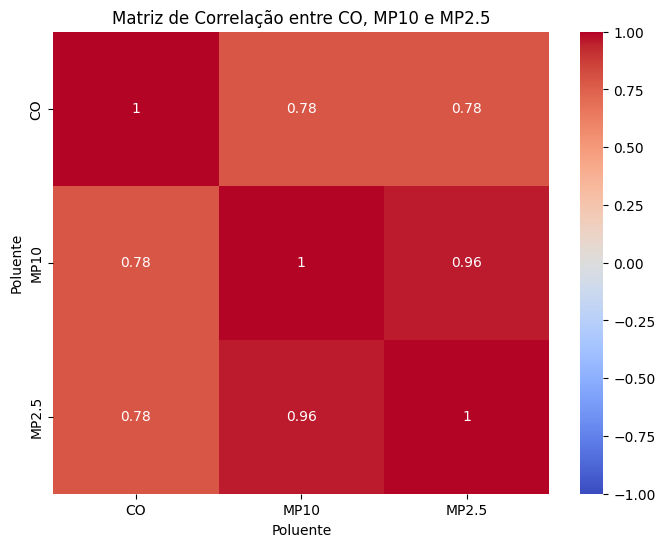

In [ ]:
# Matriz de Correlação (CO, MP10, MP2.5)

pol_sel = pol_sp2[['CO', 'MP10', 'MP2.5']]

matriz_correlacao = pol_sel.corr()

print("Matriz de Correlação:")
print(matriz_correlacao)

# Gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre CO, MP10 e MP2.5')
plt.show()


## # Teste ADF para cada poluente (CO, MP10, MP2.5)

O teste de Dickey-Fuller é aplicado.
O teste retorna a estatística ADF e o p-valor.

In [ ]:
# Função para o Teste

from statsmodels.tsa.stattools import adfuller

poluentes = ['CO', 'MP10', 'MP2.5']

def verificar_estacionariedade(serie, nome):
    resultado_adf = adfuller(serie.dropna())
    print(f"Resultados do Teste de Dickey-Fuller para {nome}:")
    print('ADF Statistic:', resultado_adf[0])
    print('p-value:', resultado_adf[1])
    for key, value in resultado_adf[4].items():
        print(f'Critical Value ({key}): {value}')
    print('-' * 50)


for poluente in poluentes:
    verificar_estacionariedade(pol_sp2[poluente], poluente)


Resultados do Teste de Dickey-Fuller para CO:
ADF Statistic: -4.8829787860954825
p-value: 3.7634825107106336e-05
Critical Value (1%): -3.436396912213269
Critical Value (5%): -2.864209963080287
Critical Value (10%): -2.5681915787162484
--------------------------------------------------
Resultados do Teste de Dickey-Fuller para MP10:
ADF Statistic: -7.7912168100950305
p-value: 7.932625920914886e-12
Critical Value (1%): -3.4363635475753824
Critical Value (5%): -2.864195245967465
Critical Value (10%): -2.5681837404258903
--------------------------------------------------
Resultados do Teste de Dickey-Fuller para MP2.5:
ADF Statistic: -8.033769613088085
p-value: 1.9270343938626234e-12
Critical Value (1%): -3.4363635475753824
Critical Value (5%): -2.864195245967465
Critical Value (10%): -2.5681837404258903
--------------------------------------------------


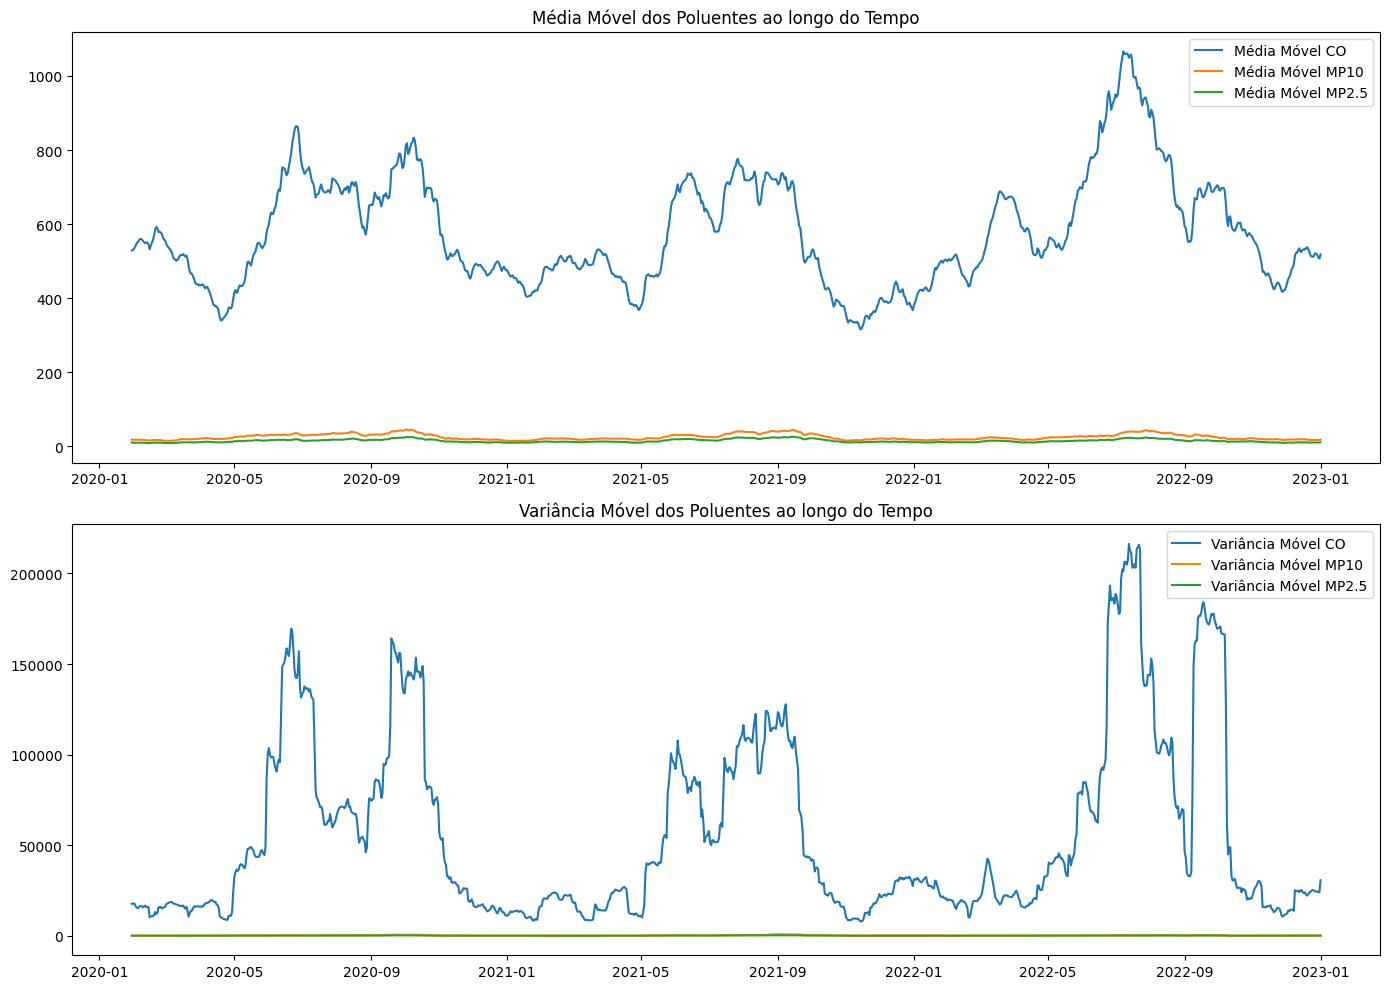

In [ ]:
# Média e Variância Móveis

janela = 30

plt.figure(figsize=(14, 10))

for i, poluente in enumerate(poluentes, 1):
    plt.subplot(2, 1, 1)
    plt.plot(pol_sp2.index, pol_sp2[poluente].rolling(window=janela).mean(), label=f'Média Móvel {poluente}')
    plt.title('Média Móvel dos Poluentes ao longo do Tempo')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(pol_sp2.index, pol_sp2[poluente].rolling(window=janela).var(), label=f'Variância Móvel {poluente}')
    plt.title('Variância Móvel dos Poluentes ao longo do Tempo')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
pol_sel

Poluente,CO,MP10,MP2.5
Data,,,
2020-01-01,561.92,33.60,27.11
2020-01-02,520.18,14.62,8.06
2020-01-03,356.97,7.76,4.75
2020-01-04,377.12,10.55,6.54
2020-01-05,411.63,12.05,8.34
...,...,...,...
2022-12-28,499.19,10.28,7.60
2022-12-29,463.90,12.28,6.97
2022-12-30,445.48,10.76,8.83


## Verificação de Sazonalidade
Decomposição da série temporal (aditiva ou multiplicativa)

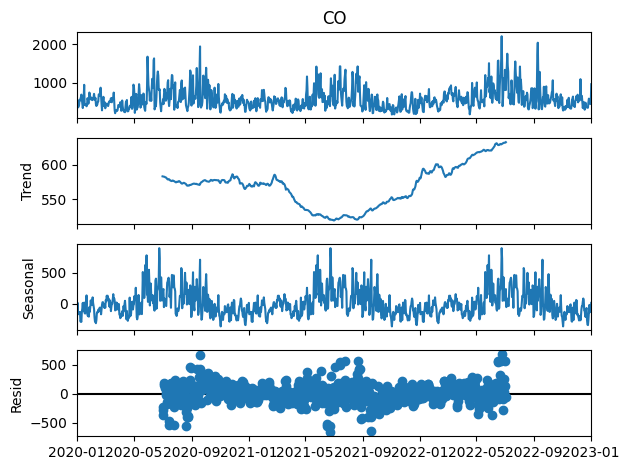

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

poluente = 'CO'

decomposicao = seasonal_decompose(pol_sel[poluente], model='additive', period=365)
decomposicao.plot()
plt.show()


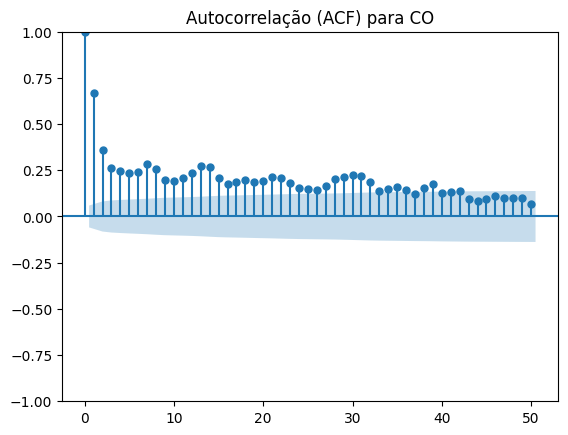

In [ ]:
# Função de Autocorrelação (ACF) pode identificar a repetição de padrões, indicando sazonalidade.

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(pol_sel[poluente], lags=50)
plt.title(f"Autocorrelação (ACF) para {poluente}")
plt.show()


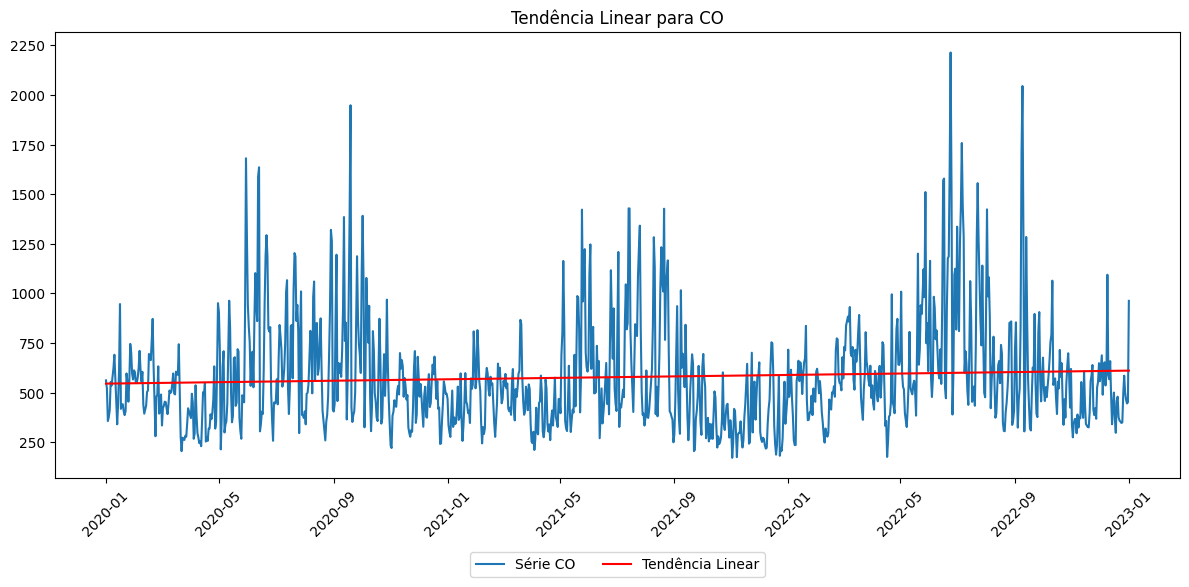

In [ ]:
# Verificação de Linearidade

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Configurando a regressão

X = np.arange(len(pol_sel)).reshape(-1, 1)
y = pol_sel[poluente].values.reshape(-1, 1)

# Ajustando a regressão linear

modelo = LinearRegression().fit(X, y)
tendencia = modelo.predict(X)

# Plotando a série e a tendência linear

plt.figure(figsize=(12, 6))
plt.plot(pol_sel.index, pol_sel[poluente], label=f'Série {poluente}')
plt.plot(pol_sel.index, tendencia, color='red', label='Tendência Linear')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.title(f"Tendência Linear para {poluente}")
plt.tight_layout()
plt.show()



##Aplicação dos Algoritmos de Série Temporal

O objetivo desta abordagem é comparar os resultados de previsões feitas apenas com o poluente CO com os resultados obtidos quando usamos outros dois poluentes, MP10 e MP2.5, como variáveis extras. A ideia é descobrir se incluir mais poluentes ajuda a entender melhor a poluição e se isso melhora a precisão das previsões.

In [ ]:
## Modelo SARIMA - CO

In [ ]:

import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

co_data = pol_sel['CO']

# Dividir os dados

train = co_data[:int(0.7*(len(co_data)))]
test = co_data[int(0.7*(len(co_data))):]

# Aplicar o modelo SARIMA

model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model = model.fit(disp=False)

# previsões
forecast = sarima_model.forecast(steps=len(test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# Avaliar o desempenho

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')


RMSE: 346.433063820879


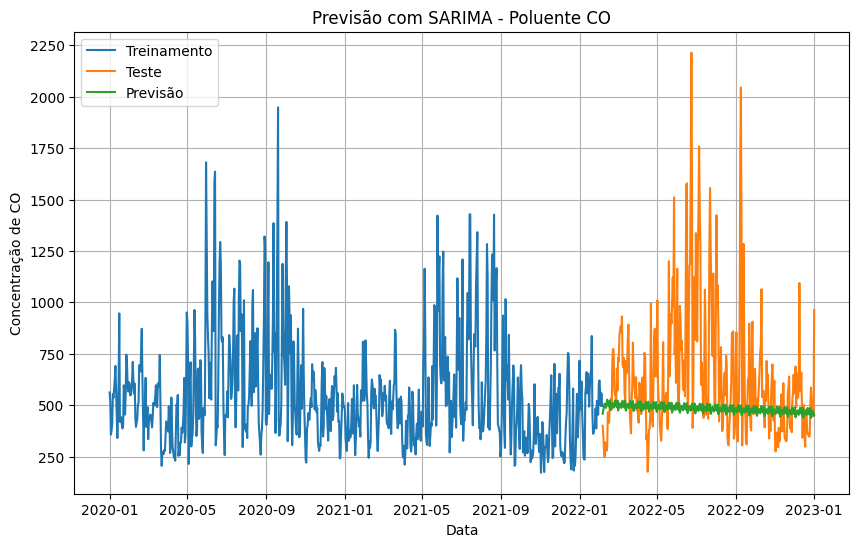

In [ ]:
# Plotar os resultados
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Treinamento')
plt.plot(test.index, test, label='Teste')
plt.plot(test.index, forecast, label='Previsão')
plt.title('Previsão com SARIMA - Poluente CO')
plt.xlabel('Data')
plt.ylabel('Concentração de CO')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Avaliando o erro

# Calcular o valor máximo e mínimo de CO
max_val = pol_sel['CO'].max()
min_val = pol_sel['CO'].min()

# Amplitude dos valores de CO
amplitude = max_val - min_val

# Exibir os resultados
print(f"Valor máximo de CO: {max_val}")
print(f"Valor mínimo de CO: {min_val}")
print(f"Amplitude dos valores de CO: {amplitude}")
print(f"RMSE: {rmse}")

# Comparação
if rmse < amplitude * 0.1:
    print("O RMSE é pequeno em relação à amplitude dos dados.")
elif rmse < amplitude * 0.3:
    print("O RMSE é moderado em relação à amplitude dos dados.")
else:
    print("O RMSE é grande em relação à amplitude dos dados.")


Valor máximo de CO: 2213.63
Valor mínimo de CO: 171.7
Amplitude dos valores de CO: 2041.93
RMSE: 346.433063820879
O RMSE é moderado em relação à amplitude dos dados.


In [ ]:
import itertools
import warnings

# Suprimindo msg de erro
warnings.filterwarnings("ignore")

# Alterando parâmetros - Testa valores de 0 e 1 e utiliza Sazonalidade anual
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = [12]

# Combinações possíveis de parâmetros para SARIMA

param_combinations = list(itertools.product(p, d, q, P, D, Q, s))

# Armazena os melhores resultados

best_aic = float("inf")
best_params = None
best_model = None

# Treinamento simplificado
for params in param_combinations:
    try:

        model = SARIMAX(train, order=(params[0], params[1], params[2]),
                        seasonal_order=(params[3], params[4], params[5], params[6]),
                        enforce_stationarity=False, enforce_invertibility=False)
        result = model.fit(disp=False)

        # Verifica o AIC para encontrar o melhor ajuste

        if result.aic < best_aic:
            best_aic = result.aic
            best_params = params
            best_model = result
    except:
        continue

# Exibe os parâmetros e AIC

print(f'Melhores Parâmetros: {best_params}')
print(f'Melhor AIC: {best_aic}')



Melhores Parâmetros: (1, 0, 1, 0, 1, 1, 12)
Melhor AIC: 9934.698887042276


In [ ]:
# Faz previsões com o melhor modelo

forecast_best_model = best_model.predict(start=len(train), end=len(co_data) - 1, dynamic=False)

# Avalia o erro do melhor modelo

rmse_best_model = np.sqrt(mean_squared_error(test, forecast_best_model))
print(f'RMSE do melhor modelo: {rmse_best_model}')


RMSE do melhor modelo: 321.4938560844341


In [ ]:
## modelo SARIMAX utilizando o poluente CO como a variável dependente (target) e os poluentes MP10 e MP2.5 como variáveis exógenas (independentes)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

train_size = int(len(pol_sel) * 0.7)
train, test = pol_sel[:train_size], pol_sel[train_size:]

# Separando a variável dependente (CO) e as variáveis exógenas (MP10 e MP2.5)

train_exog = train[['MP10', 'MP2.5']]
test_exog = test[['MP10', 'MP2.5']]

# Treinando o modelo SARIMAX

model = SARIMAX(train['CO'], exog=train_exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_model = model.fit()

# Previsões com os dados de teste

predictions = sarimax_model.forecast(steps=len(test), exog=test_exog)



RMSE do modelo SARIMAX: 249.52845974021847


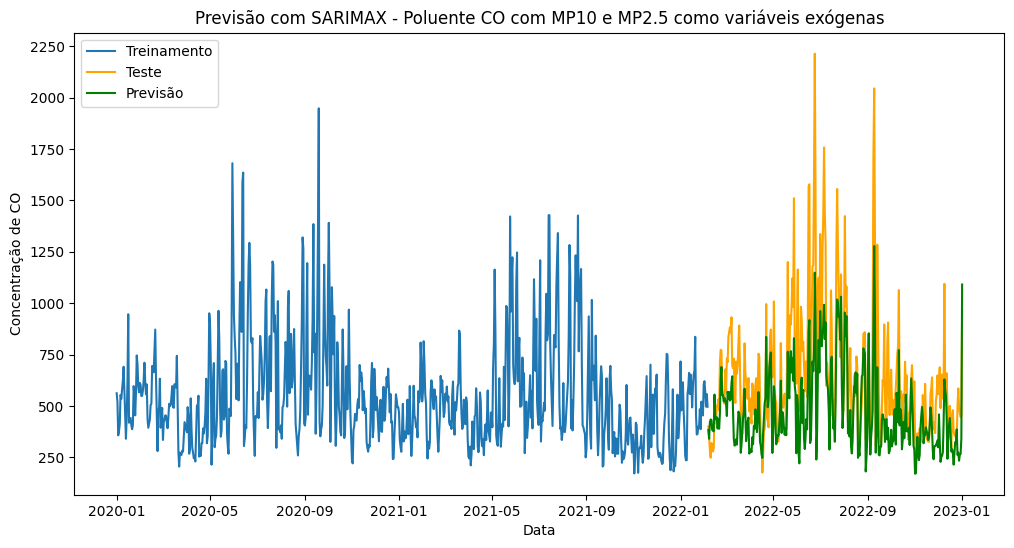

In [ ]:
# Avaliar o desempenho com RMSE

rmse = np.sqrt(mean_squared_error(test['CO'], predictions))
print(f'RMSE do modelo SARIMAX: {rmse}')

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['CO'], label='Treinamento')
plt.plot(test.index, test['CO'], label='Teste', color='orange')
plt.plot(test.index, predictions, label='Previsão', color='green')
plt.title('Previsão com SARIMAX - Poluente CO com MP10 e MP2.5 como variáveis exógenas')
plt.xlabel('Data')
plt.ylabel('Concentração de CO')
plt.legend()
plt.show()


Ajustando o modelo SARIMAX...
AIC do modelo ajustado: 13452.547308986084
Gerando previsões...
RMSE do modelo SARIMAX: 135.53961262641707


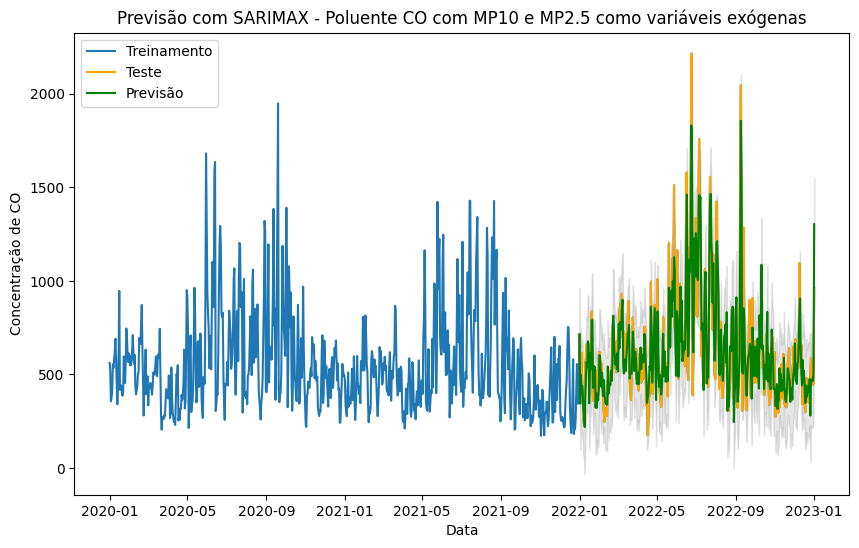

In [ ]:
# Ajustando os parâmentros

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Definindo a série dependente (CO) e as variáveis exógenas (MP10 e MP2.5)
y = pol_sel['CO']
exog_vars = pol_sel[['MP10', 'MP2.5']]

# Definindo os parâmetros do SARIMAX
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Ajustando o modelo SARIMAX
print("Ajustando o modelo SARIMAX...")
model = SARIMAX(y, exog=exog_vars, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Exibindo os parâmetros ajustados e o AIC
print(f"AIC do modelo ajustado: {results.aic}")

# Previsão e avaliação
print("Gerando previsões...")
pred = results.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()

# análise de desempenho
y_forecasted = pred.predicted_mean
y_truth = y['2022-01-01':]
rmse = np.sqrt(mean_squared_error(y_truth, y_forecasted))
print(f"RMSE do modelo SARIMAX: {rmse}")

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(y, label='Treinamento')
plt.plot(y_truth, color='orange', label='Teste')
plt.plot(pred.predicted_mean, color='green', label='Previsão')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.1)
plt.xlabel('Data')
plt.ylabel('Concentração de CO')
plt.legend()
plt.title('Previsão com SARIMAX - Poluente CO com MP10 e MP2.5 como variáveis exógenas')
plt.show()



## Analizando outras formas de avalição que sejam mais intuitivas e de fácil entendimento ao leitor.

In [ ]:
# MAPE - é o Percentual de Erro Absoluto Médio, que expressa o erro de previsão como uma porcentagem dos valores reais

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Cálculo do MAPE
mape = mean_absolute_percentage_error(y_truth, y_forecasted)
print(f"MAPE do modelo SARIMAX: {mape:.2f}%")


MAPE do modelo SARIMAX: 17.47%


In [ ]:
# R² (R-quadrado), mede a proporção da variabilidade explicada pelo modelo.

from sklearn.metrics import r2_score

# Cálculo do R²
r2 = r2_score(y_truth, y_forecasted)
print(f"R² do modelo SARIMAX: {r2:.2f}")


R² do modelo SARIMAX: 0.79


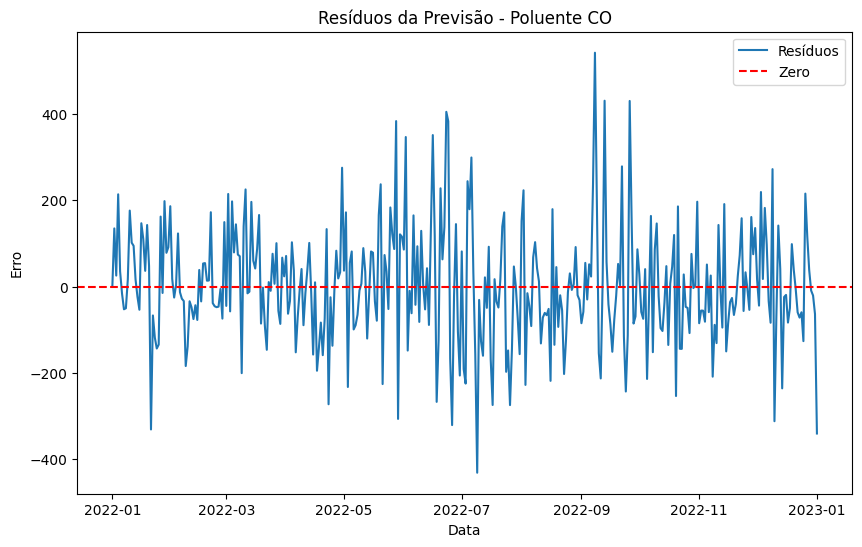

In [ ]:
# Gráficos com Resíduos - mostra a adequação do modelo (diferença entre o valor real e o valor previsto)

residuals = y_truth - y_forecasted

plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Resíduos')
plt.axhline(0, linestyle='--', color='red', label='Zero')
plt.title('Resíduos da Previsão - Poluente CO')
plt.xlabel('Data')
plt.ylabel('Erro')
plt.legend()
plt.show()


In [ ]:
print(f"Resultados do modelo SARIMAX:")
print(f"AIC: {results.aic:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.2f}")


Resultados do modelo SARIMAX:
AIC: 13452.55
RMSE: 135.54
MAPE: 17.47%
R²: 0.79


Devido ao resultado do MAPE, avaliando que os dados são não lineares vamos aplicar o algoritmo XGBoost/LightGBM para analisar se ele se ajusta melhor aos dados, trazendo resultados mais robustos

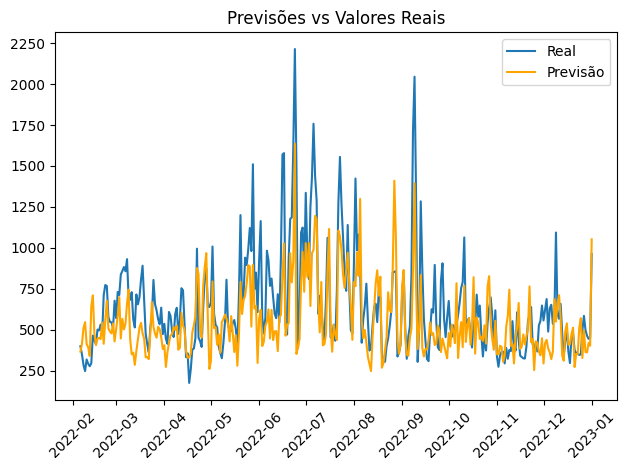

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Preparar dados
X = pol_sel[['MP10', 'MP2.5']]
y = pol_sel['CO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Modelo XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')
model_xgb.fit(X_train, y_train)

# Previsões
y_pred = model_xgb.predict(X_test)

# Gráfico
plt.plot(y_test.index, y_test, label='Real')
plt.plot(y_test.index, y_pred, label='Previsão', color='orange')
plt.title('Previsões vs Valores Reais')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Avaliação do xgboost

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

RMSE: 234.5099091173724
MAE: 171.5459118578362
R²: 0.4144690504026566


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Melhores parâmetros encontrados: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


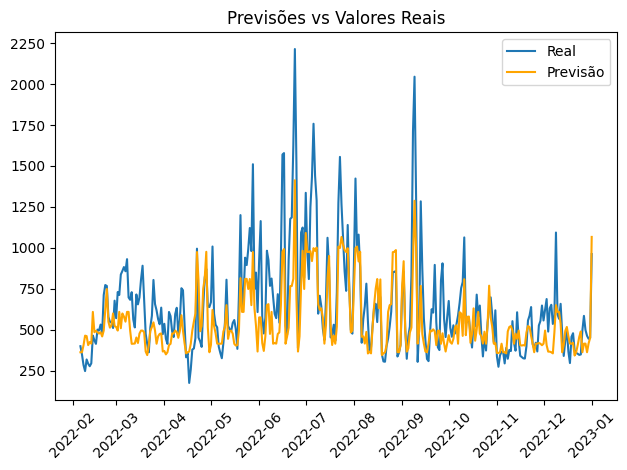

RMSE: 210.4384880851025
MAE: 148.89011362896545
R²: 0.5285042257725908


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Preparar dados
X = pol_sel[['MP10', 'MP2.5']]
y = pol_sel['CO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Parâmetros simplificados
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'max_depth': [3, 5]
}

# Instanciar o modelo
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Realizar a busca pelos melhores parâmetros
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhor conjunto de parâmetros
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Treinar o modelo com os melhores parâmetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Previsões
y_pred = best_model.predict(X_test)

# Gráfico
plt.plot(y_test.index, y_test, label='Real')
plt.plot(y_test.index, y_pred, label='Previsão', color='orange')
plt.title('Previsões vs Valores Reais')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Avaliação
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

